In [1]:
import tensorflow as tf
print("tensorflow: ",tf.__version__)

import keras
print("keras: ",keras.__version__)

D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is 

tensorflow:  1.13.2
keras:  2.2.4


Using TensorFlow backend.


## data processing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import the data

In [3]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
#keras only takes numpy array
training_set = dataset_train.iloc[:, 1: 2].values

feature scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
sc = MinMaxScaler(feature_range = (0, 1))
#fit: get min/max of train data
training_set_scaled = sc.fit_transform(training_set)

Data structure creation

In [6]:
## 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [7]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [8]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

Data reshaping

In [9]:
X_train = np.reshape(X_train, newshape = 
                     (X_train.shape[0], X_train.shape[1], 1))

## build RNN

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import keras
import tensorflow

In [11]:
##initialize the model

In [12]:
regressor = Sequential()

add 1st lstm layer

In [13]:
regressor.add(LSTM(50, return_sequences = True, input_shape = (X_train.shape[1], 1)))

regressor.add(Dropout(0.3))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
##add 2nd lstm layer: 50 neurons
regressor.add(LSTM(50, return_sequences = True))
regressor.add(Dropout(0.3))


In [15]:
##add 3rd lstm layer
regressor.add(LSTM(50, return_sequences = True))
regressor.add(Dropout(0.3))


In [16]:
##add 4th lstm layer
regressor.add(LSTM(50, return_sequences = False))
regressor.add(Dropout(0.3))

In [17]:
##add output layer
regressor.add(Dense(1))
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
__________

## Model compiling

In [18]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

Instructions for updating:
Use tf.cast instead.


## Model fit

In [19]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
1198/1198 [==============================] - 14s 11ms/sample - loss: 0.0656
Epoch 2/10
1198/1198 [==============================] - 10s 8ms/sample - loss: 0.0090
Epoch 3/10
1198/1198 [==============================] - 10s 9ms/sample - loss: 0.0078
Epoch 4/10
1198/1198 [==============================] - 9s 8ms/sample - loss: 0.0070
Epoch 5/10
1198/1198 [==============================] - 10s 8ms/sample - loss: 0.0061
Epoch 6/10
1198/1198 [==============================] - 9s 8ms/sample - loss: 0.0061
Epoch 7/10
1198/1198 [==============================] - 9s 8ms/sample - loss: 0.0058
Epoch 8/10
1198/1198 [==============================] - 9s 8ms/sample - loss: 0.0064
Epoch 9/10
1198/1198 [==============================] - 10s 8ms/sample - loss: 0.0060
Epoch 10/10
1198/1198 [==============================] - 10s 8ms/sample - loss: 0.0052


## Model prediction

import test data

In [20]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
#keras only takes numpy array
real_stock_price = dataset_test.iloc[:, 1: 2].values

create prediction input

In [21]:
#vertical concat use 0, horizontal uses 1
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), 
                          axis = 0)
##use .values to make numpy array
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [22]:
#reshape data to only have 1 col
inputs = inputs.reshape(-1, 1)

In [23]:
#scale input
inputs = sc.transform(inputs)

create test data strucutre

In [24]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#add dimension of indicator
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

model prediction

In [25]:
predicted_stock_price = regressor.predict(X_test)

In [26]:
#inverse the scaled value
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

## Result visualization

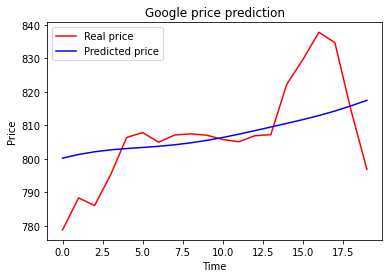

In [27]:
##visualize the prediction and real price
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')

plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [28]:
from see_rnn import get_gradients, features_0D, features_1D, features_2D

............................................................................................................................................................................................................................................................................................................

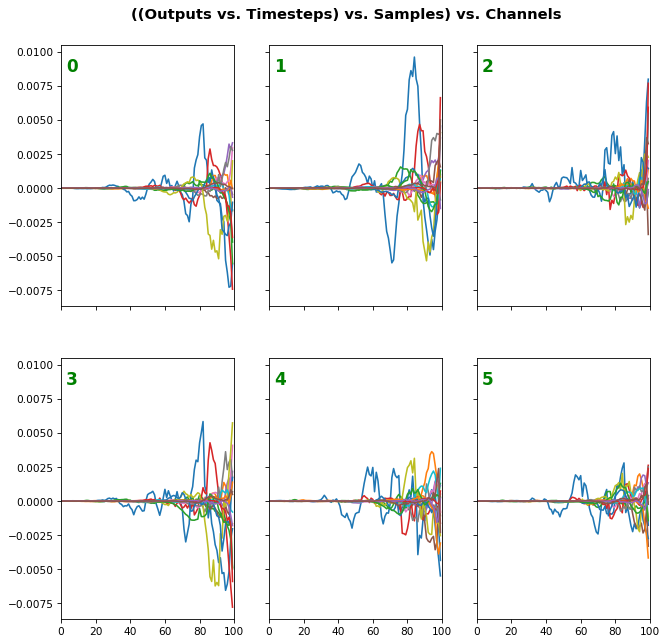

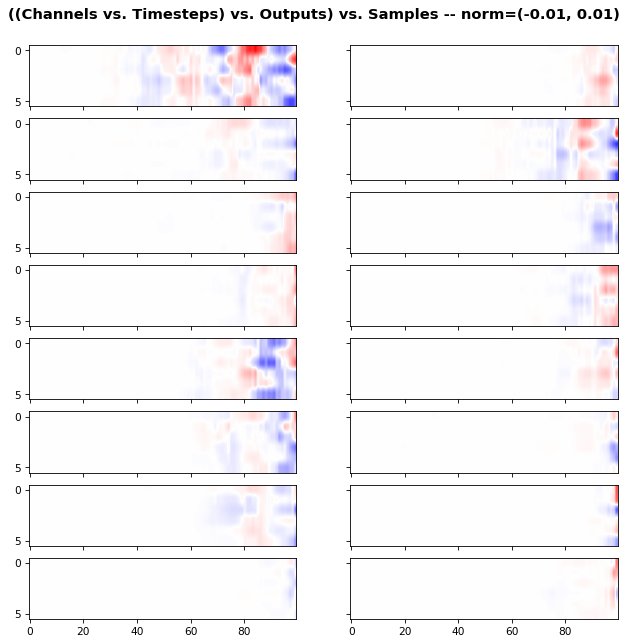

(<Figure size 760x760 with 16 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022B13E2FDC8>,
       dtype=object))

In [29]:
import numpy as np
from keras.layers import Input, LSTM
from keras.models import Model
from keras.optimizers import Adam
from see_rnn import get_gradients, features_0D, features_1D, features_2D

def make_model(rnn_layer, batch_shape, units):
    ipt = Input(batch_shape=batch_shape)
    x   = rnn_layer(units, activation='tanh', return_sequences=True)(ipt)
    out = rnn_layer(units, activation='tanh', return_sequences=False)(x)
    model = Model(ipt, out)
    model.compile(Adam(4e-3), 'mse')
    return model
    
def make_data(batch_shape):
    return np.random.randn(*batch_shape), \
           np.random.uniform(-1, 1, (batch_shape[0], units))

def train_model(model, iterations, batch_shape):
    x, y = make_data(batch_shape)
    for i in range(iterations):
        model.train_on_batch(x, y)
        print(end='.')  # progbar
        if i % 40 == 0:
            x, y = make_data(batch_shape)

units = 6
batch_shape = (16, 100, 2*units)

model = make_model(LSTM, batch_shape, units)
train_model(model, 300, batch_shape)

x, y  = make_data(batch_shape)
grads_all  = get_gradients(model, 1, x, y)  # return_sequences=True,  layer index 1
grads_last = get_gradients(model, 2, x, y)  # return_sequences=False, layer index 2

features_1D(grads_all, n_rows=2)
features_2D(grads_all, n_rows=8, norm=(-.01, .01))

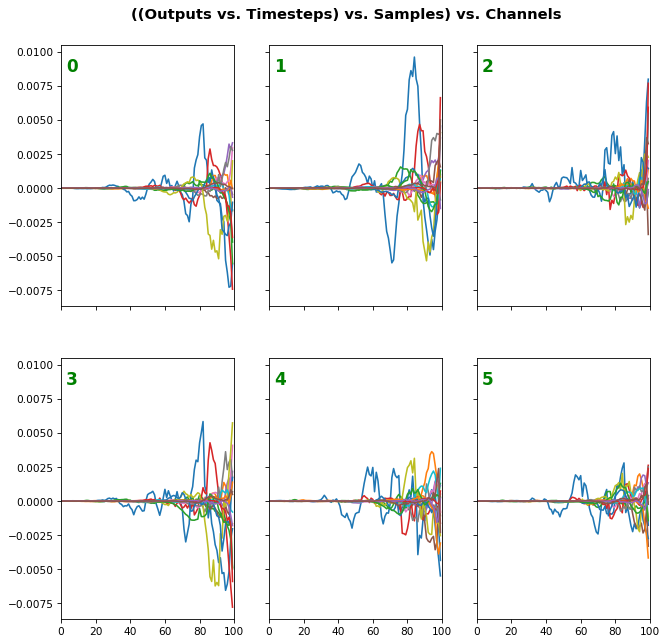

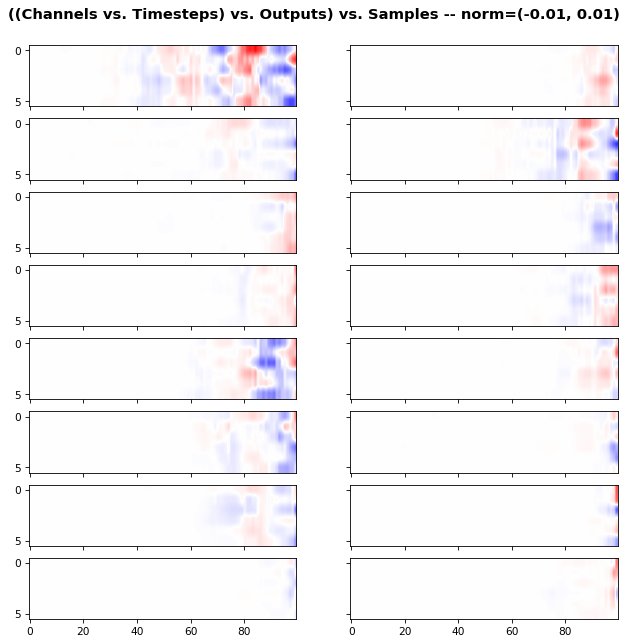

(<Figure size 760x760 with 16 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022B14E10F88>,
       dtype=object))

In [30]:
features_1D(grads_all, n_rows=2)
features_2D(grads_all, n_rows=8, norm=(-.01, .01))